<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker
## Notebook 7: Review and a few new functions

In this Notebook, we practice with many of the Python concepts and functions that we learned in Q1 and we revisit some of the problems of the first individual notebook. You must all exercises in this notebook, even when you had all exercises in the individual notebook correct. 

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Assert
It is always a good idea to make sure that the input arguments of a function are correct. For example, make sure that an input argument is a string or that it is an array of a certain length, or that a probability is between 0 and 1, etc. An `assert` statement takes a condition and a message that is printed to the screen when the condition is not met. Remove the `#` markers below and run the code to see the assertion error. Then replace the `#` markers so that your notebook doesn't give an error.

In [6]:
#a = 8
#assert a == 7, 'Error: a must equal 7'

In [4]:
a = 7
assert a == 7, 'Error: a must equal 7'  # now nothing happens, as a equal 7

### Exercise 1, Rock-Paper-Scissors
Build a rock-papers-scissors game. If you are unfamiliar with the game, you can read about it [here](https://en.wikipedia.org/wiki/Rock–paper–scissors). Basic rules are that rock beats scissors, scissors beats paper, and paper beats rock. Write a function that takes one input argument: a string with your play in the game (so either 'rock', 'paper', or 'scissors'). The function returns three strings: your play, your opponent's play, and the result of the game for you ('you win', 'you lose', or 'tie'). 

Your function will probably include a number of `if` and `elif` commands.
Inside the function, you need to generate a random answer of your opponent, which can be done with the command `np.random.choice(['rock', 'paper', 'scissors'])` (more on the `choice` function in Q2). 

Make sure that your function has only one return statement at the end of the function and include an `assert` statement that checks whether the input argument is either `rock`, `paper`, or `scissors`. 

Demonstrate that your function works by calling it a 5 times times with `rock`, 5 times with `paper`, and 5 times with `scissors` and print the results to the screen.

In [37]:
def game(a):
    assert a == "rock" or a == "paper" or a == "scissors" , "Error : you must input \"rock\" or \"paper\" or \"scissors\" "
    b = np.random.choice(['rock', 'paper', 'scissors'])
    if a == b:
        c = "tie"
    elif a == "rock" and b == "scissors":
        c = "you win"
    elif b == "rock" and a == "scissors":
        c = "you lose"
    elif len(a) < len(b):
        c = "you lose"
    else:
        c = "you win"
    return f"Your play is {a}. your opponent's play is {b}. The result of this game is: {c}."

for i in range(5):
    print(game("rock"))
    print(game("paper"))
    print(game("scissors"))
    

Your play is rock. your opponent's play is paper. The result of this game is: you lose.
Your play is paper. your opponent's play is rock. The result of this game is: you win.
Your play is scissors. your opponent's play is paper. The result of this game is: you win.
Your play is rock. your opponent's play is scissors. The result of this game is: you win.
Your play is paper. your opponent's play is paper. The result of this game is: tie.
Your play is scissors. your opponent's play is scissors. The result of this game is: tie.
Your play is rock. your opponent's play is rock. The result of this game is: tie.
Your play is paper. your opponent's play is rock. The result of this game is: you win.
Your play is scissors. your opponent's play is rock. The result of this game is: you lose.
Your play is rock. your opponent's play is scissors. The result of this game is: you win.
Your play is paper. your opponent's play is rock. The result of this game is: you win.
Your play is scissors. your oppon

### Exercise 2, Steel tension tests

Steel with code SXXX has an average minimum yield of XXX MPa. The results of steel tension tests (in MPa) are stored in a file. 
Your task is to identify the tests where the result is more than 30 MPa lower than the required value (i.e., for S355 steel all values that are less than 325 MPa). 

Write a function that takes two input arguments: the name of a file with results of steel tension tests and the value of the average minimum yield. The function creates a new figure and plots a horizontal line at 30 MPa below the required value and then plots all data points above this line with blue markers and below this line with red markers. The function returns nothing.

Test your function with the files `steel_samples_S355.dat` (for S355 steel) and `tests_steelS460.dat` (for S460 steel).

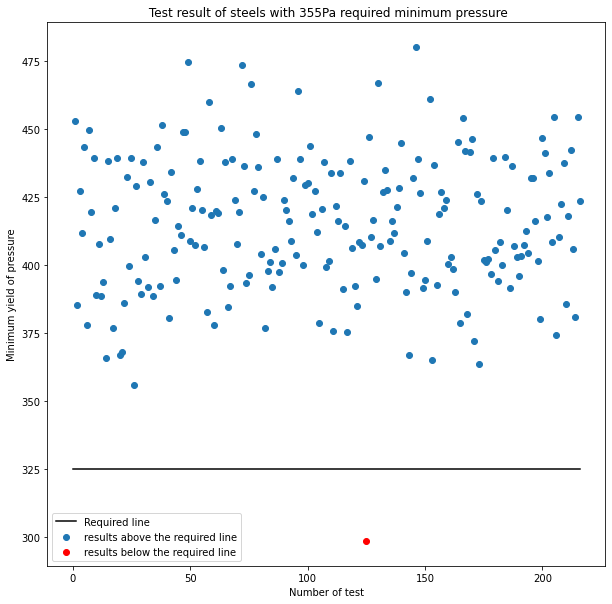

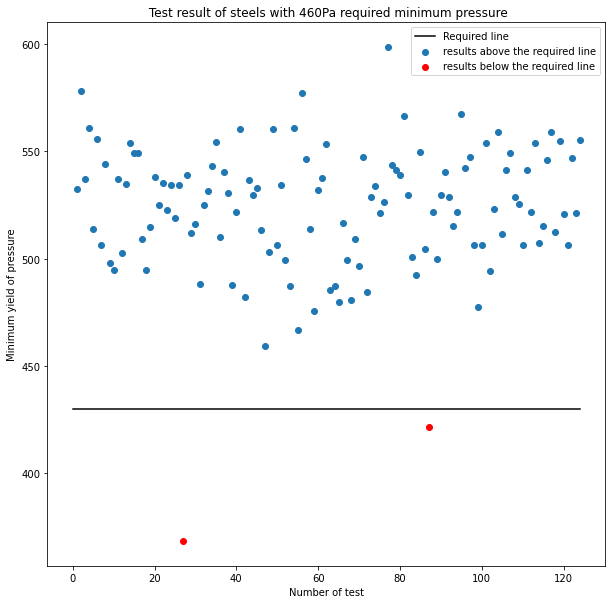

In [72]:
def test(a, b):
    c = np.loadtxt(a)
    x = np.arange(1, len(c) + 1)
    plt.figure(figsize = (10, 10))
    plt.scatter(x[c >= (b - 30)], c[c >= (b - 30)], label = "results above the required line")
    plt.scatter(x[c < (b - 30)], c[c < (b - 30)], color = "red", label = "results below the required line")
    plt.plot(np.linspace(0, len(c), 20), (b - 30) * np.ones(20), color = "black", label = "Required line")
    plt.legend()
    plt.xlabel("Number of test")
    plt.ylabel("Minimum yield of pressure")
    plt.title(f" Test result of steels with {b}Pa required minimum pressure")
    
test("steel_samples_S355.dat", 355)
test("tests_steelS460.dat", 460)

### Exercise 3, Steel tension tests continued
Modify the function you wrote in Exercise 3 so that it takes only the file name as input and not the average minimum yield. The filename must end with SXXX, where XXX is the average minimum yield. Your function must then extract the minimum yield from the file name. Refer to Notebook 3 to find out how to split a string and access certain characters of a string. 

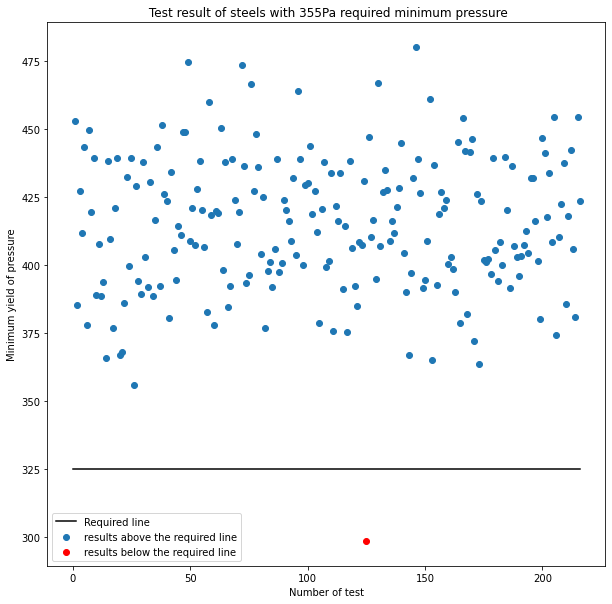

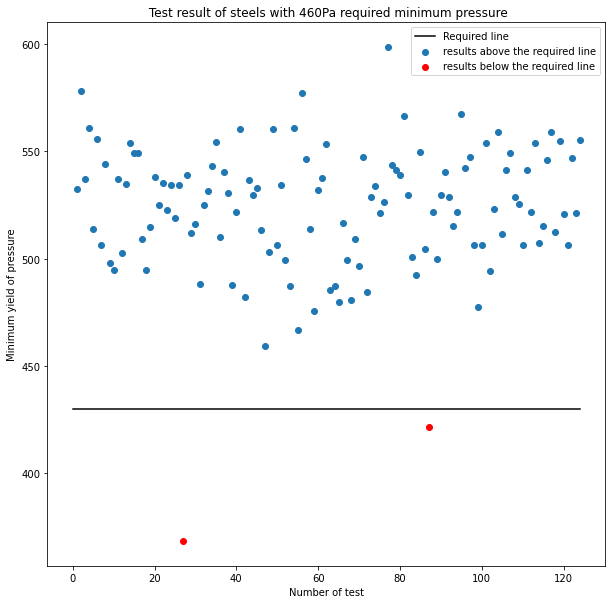

In [79]:
def test(a):
    c = np.loadtxt(a)
    a_b = a.split("S")
    b = int(a_b[1][0:3])
    x = np.arange(1, len(c) + 1)
    plt.figure(figsize = (10, 10))
    plt.scatter(x[c >= (b - 30)], c[c >= (b - 30)], label = "results above the required line")
    plt.scatter(x[c < (b - 30)], c[c < (b - 30)], color = "red", label = "results below the required line")
    plt.plot(np.linspace(0, len(c), 20), (b - 30) * np.ones(20), color = "black", label = "Required line")
    plt.legend()
    plt.xlabel("Number of test")
    plt.ylabel("Minimum yield of pressure")
    plt.title(f" Test result of steels with {b}Pa required minimum pressure")
    
test("steel_samples_S355.dat")
test("tests_steelS460.dat")

### Exercise 4
Write a Python function that takes as input an array of daily rainfall values and returns an array of the same length with the cumulative rainfall at the end of each day (e.g, the 10$^{th}$ value in the array is the sum of the rainfall in the first 10 days). You are not allowed to use `np.cumsum`, but must compute the cumulative rainfall with a loop. 

The file `Precipitation_Delft_June_2021.txt` contains the rainfall in Delft for each day in June of 2021 in mm/day. Load the data of the file. Compute and plot the cumulative rainfall for Delft for June 2021 vs. the day of the month. Label the axes and give your plot a title with the total rainfall in June. Turn the grid on using `plt.grid`. 
**Note that your function must determine the length of the array inside the function, that the plotting is done outside the function, and that the plot must have the correct title**


Text(0, 0.5, 'Cummulative rainfall in mm')

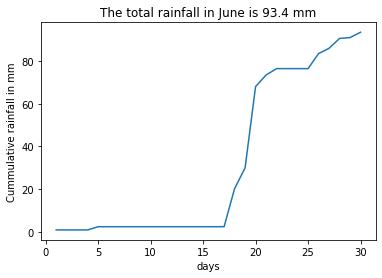

In [91]:
def cd(a):
    b = np.zeros(len(a))
    b[0] = a[0]
    for i in range(len(a)-1):
        b[i+1] = b[i] + a[i+1]
    return b

a = np.loadtxt("Precipitation_Delft_June_2021.txt", delimiter = ",")
plt.plot(np.arange(1, len(a)+1), cd(a))
plt.title(f"The total rainfall in June is {cd(a)[len(a)-1]} mm")
plt.xlabel("days")
plt.ylabel("Cummulative rainfall in mm")

### Exercise 5

The function $f(x)=\text{e}^{x}$ may be approximated with the following series of $N+1$ terms

$$f(x) =\sum\limits_{n=0}^N \frac{x^n}{n!} \$$

Write a Python function that takes one input argument $x$, which is an array, and one keyword argument $N$, which is the upper limit of the summation (i.e., the summation is from $n = 0$ up to and including $n = N$). The function returns the approximation of $f(x)$ for every value of $x$. The factorial $n!=1*2*3*...*n$ may be computed with the function `factorial` of the `math` package (the value of $0!=1$).

Use your function to compute and plot the approximation of $f(x)$ with $N = [2, 3, 4, 8]$ for $x$ ranging from $-3$ to $3$ with 100 points. Plot $f(x)=\text{e}^{x}$ in the same figure with a wide black line. Label the axes and add a legend stating the number of terms $N$ for each plotted line of the approximation.

Text(0, 0.5, 'y')

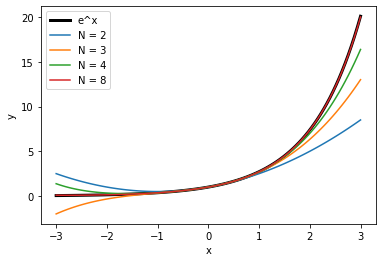

In [110]:
from math import *

def simexp(x, N):
    s = np.zeros(len(x))
    for i in range(N + 1):
        s += x ** i / factorial(i)
    return s

x = np.linspace(-3, 3, 100)
plt.plot(x, np.exp(x), label = "e^x", color = "black", linewidth = 3)
for n in [2, 3, 4, 8]:
    plt.plot(x, simexp(x, n), label = f"N = {n}")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

### Exercise 6
Write a function that counts how many times a letter occurs in a word. The function takes two input arguments: `word` and `letter`, which are both strings. Inside the function, use a loop to count how many times the letter appears in the word. The function returns a string of the form:  
`The letter X occurs Y times in the word ZZZZ`, where X is the letter that was provided, Y is the computed number of times X appears in the word, and ZZZZ is the word that was provided`. Small letters and capitals all count the same. 

Demonstrate that your function works by using
* the word 'superdooper' and the letter 'r' (count=2). 
* the word 'Python' (with a capital) and the letter 'p' (count=1).
* the word 'TU Delft` and the letter 'T' (count=2).
* the word 'TU Delft` and the letter 'z' (count=0).

**Note that your function must return the described string and the printing must be done outside the function and handle lower and upper case equally**

In [118]:
def cc(w, l):
    s = 0
    for i in w:
        if i.upper() == l.upper():
            s += 1
    return f"The letter {l} occurs {s} times in the word {w}"

list = [('superdooper', 'r'), ('Python', 'p'), ('TU Delft', 'T'), ('TU Delft', 'z')]
for w, l in list:
    print(cc(w, l))

The letter r occurs 2 times in the word superdooper
The letter p occurs 1 times in the word Python
The letter T occurs 2 times in the word TU Delft
The letter z occurs 0 times in the word TU Delft
